Adrien Clay

Springboard Data Science

12/23/2020

In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
mush = pd.read_csv("mushrooms.csv")

In [4]:
mush.shape

(8124, 23)

In [5]:
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

<AxesSubplot:>

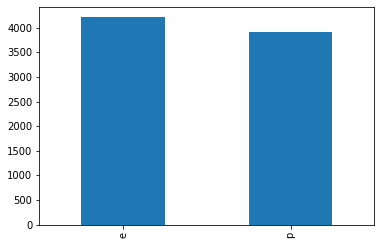

In [7]:
mush['class'].value_counts().plot(kind='bar')

We would benefit from knowing what characteristics are unique to each type of mushroom, and what categories they occupy split by poisonous and edible.

Text(0.5, 1.0, 'Cap Shape by Class')

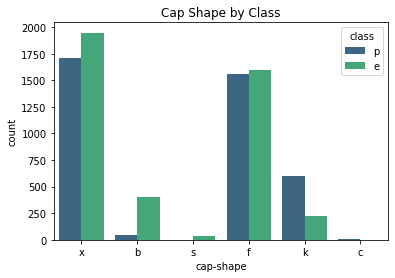

In [8]:
sns.countplot(x='cap-shape', hue='class', data=mush, palette='viridis')
plt.title("Cap Shape by Class")

### It would appear that poisonous mushrooms have cap shape x and f typically, but this doesn't make a distinction because edible mushrooms do too.

Text(0.5, 1.0, 'Cap Surface by Class')

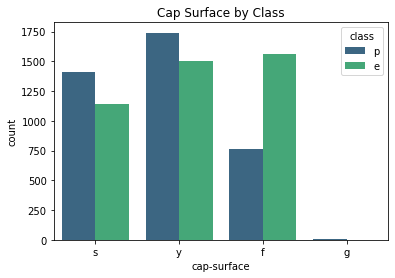

In [9]:
sns.countplot(x='cap-surface', hue='class', data=mush, palette='viridis')
plt.title("Cap Surface by Class")

Cap shape s and y seem to have a larger population of poisonous mushrooms, but still plenty of edible varieties.

Text(0.5, 1.0, 'Cap Color by Class')

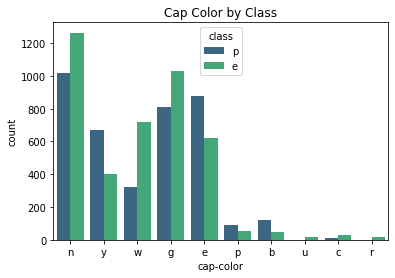

In [10]:
sns.countplot(x='cap-color', hue='class', data=mush, palette='viridis')
plt.title("Cap Color by Class")

In [11]:
def plot_count(column):
    sns.countplot(x=column, hue='class', data=mush, palette='viridis')
    plt.title(str.title(column) + " by Class")

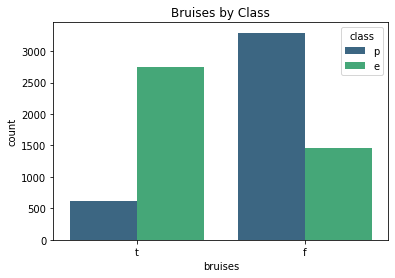

In [12]:
plot_count('bruises')

<ipython-input-13-153fa348b320>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i, figsize=(4, 3))


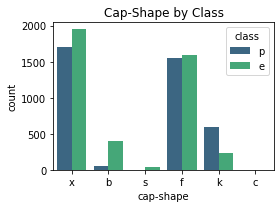

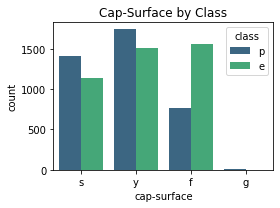

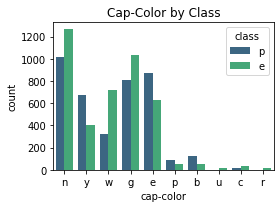

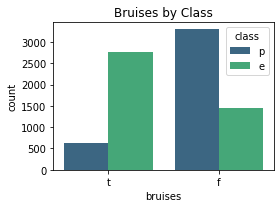

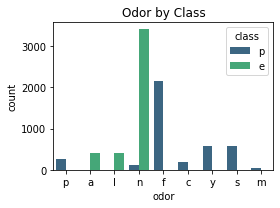

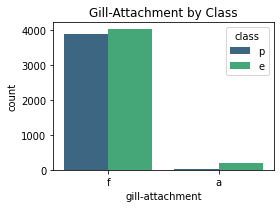

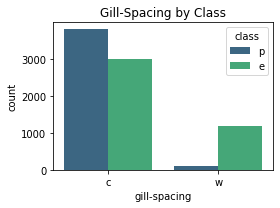

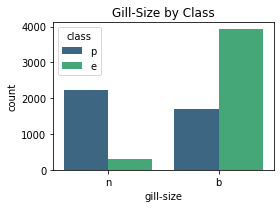

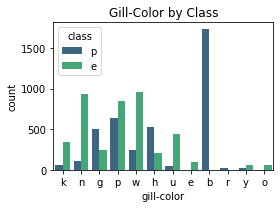

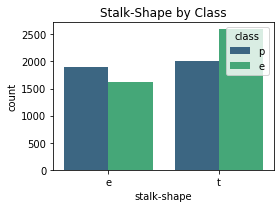

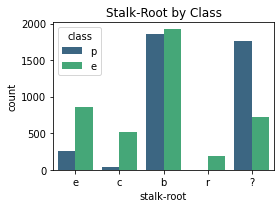

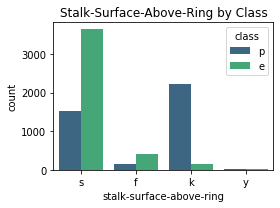

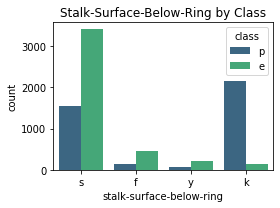

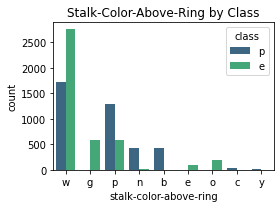

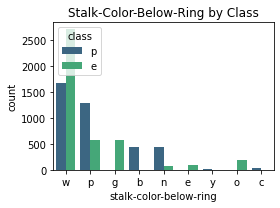

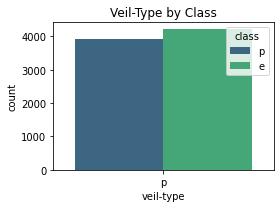

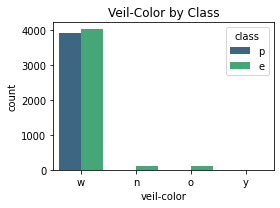

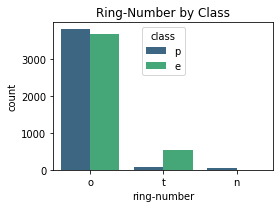

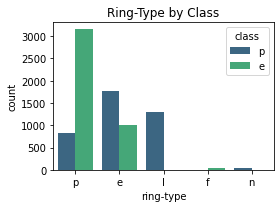

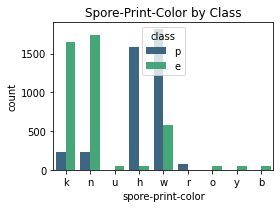

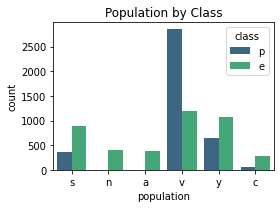

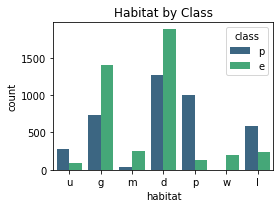

In [13]:
start = 1
for i in range(len(mush.columns)):
    plt.figure(i, figsize=(4, 3))
    plot_count(mush.columns[start])
    start +=1 
    plt.tight_layout()
    if start == 23:
        break

A few of these in particular stand out, as far as poisonous outweighing edible:
1. Stalk Surface Below Ring

    - There is a vast majority labeled "k" for poisonous mushrooms that heavily outweigh edible

2. Stalk Surface Above Ring
    - Similarly, the two types are classed as s or k for Edible and poisonous respectively.
    
    
3. Spore Print Color

    - Most poisonous mushrooms outweigh edible mushrooms labeled "W" for this variable
    
    
4. Population

    - Most poisonous mushrooms fall in population "V", along with some edible mushrooms, but the edible mushrooms are vastly outweighed

In [14]:
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [15]:
stalk_surface_p = mush[mush['class'] == 'p']['stalk-surface-below-ring'].value_counts()
stalk_surface_e = mush[mush['class'] == 'e']['stalk-surface-below-ring'].value_counts()

Text(0.5, 1.0, 'Edible by Stalk Surface Below Ring')

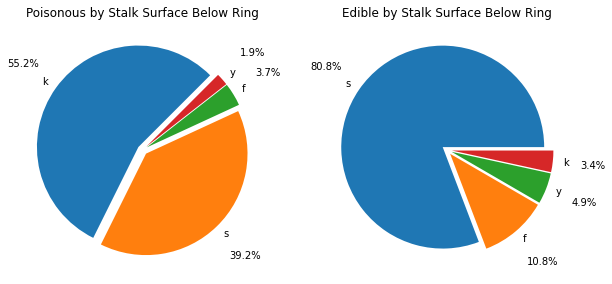

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(10,6))
p_labels = stalk_surface_p.keys()
e_labels= stalk_surface_e.keys()
ax[0].pie(x=stalk_surface_p, autopct="%.1f%%", labels=p_labels, explode=[.05] * len(p_labels), pctdistance=1.4, startangle=45)
ax[0].set_title("Poisonous by Stalk Surface Below Ring")
ax[1].pie(x=stalk_surface_e, autopct="%.1f%%", labels=e_labels, explode=[.05] * len(e_labels), pctdistance=1.4)
ax[1].set_title("Edible by Stalk Surface Below Ring")

The majority of poisonous plants fall under category "K" while only 3.4% of edible plants fall under category "K"

In [17]:
spore_p = mush[mush['class'] == 'p']['spore-print-color'].value_counts()
spore_e = mush[mush['class'] == 'e']['spore-print-color'].value_counts()

Text(0.5, 1.0, 'Edible Spore Print Color Below Ring')

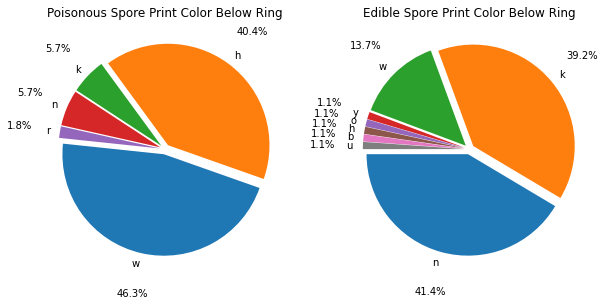

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(10,6))
p_labels = spore_p.keys()
e_labels= spore_e.keys()
ax[0].pie(x=spore_p, autopct="%.1f%%", labels=p_labels, explode=[.05] * len(p_labels), pctdistance=1.4, startangle=174)
ax[0].set_title("Poisonous Spore Print Color Below Ring")
ax[1].pie(x=spore_e, autopct="%.1f%%", labels=e_labels, explode=[.05] * len(e_labels), pctdistance=1.4, startangle= 180)
ax[1].set_title("Edible Spore Print Color Below Ring")

The majority of spore print colors for poisonous mushrooms fall in category "W" and "H", where as edible mushrooms only occupy 13.7% of W and 1.1% of H

In [19]:
population_p = mush[mush['class'] == 'p']['population'].value_counts()
population_e = mush[mush['class'] == 'e']['population'].value_counts()

Text(0.5, 1.0, 'Edible Population')

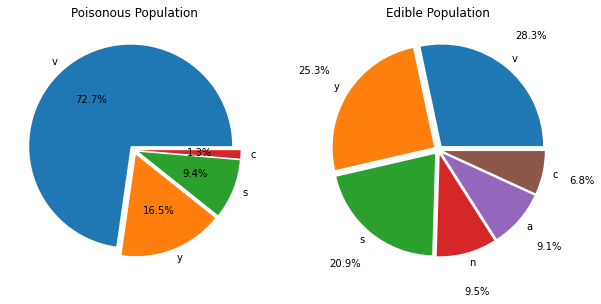

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(10,6))
p_labels = population_p.keys()
e_labels= population_e.keys()
ax[0].pie(x=population_p, autopct="%.1f%%", labels=p_labels, explode=[.05] * len(p_labels))
ax[0].set_title("Poisonous Population")
ax[1].pie(x=population_e, autopct="%.1f%%", labels=e_labels, explode=[.05] * len(e_labels), pctdistance=1.4, startangle= 0)
ax[1].set_title("Edible Population")

The edible population is more broken up whereas nearly 3/4 of the poisonous population falls in "v" population

This is in contrast to the edible population falling within 28.4% of this population.

In [21]:
df = pd.get_dummies(mush, drop_first=True)

In [22]:
df.head()

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [23]:
df.shape

(8124, 96)

In [24]:
X = df.drop('class_p', axis=1)
y  = df['class_p']

In [25]:
print(X.shape)
print(y.shape)

(8124, 95)
(8124,)


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, plot_roc_curve
from sklearn.ensemble import RandomForestClassifier

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

In [28]:
def fit_and_score(classifier):
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    print("Accuracy Score: " + str(round(accuracy_score(y_test, pred), 6) * 100) + "%")
    print(classification_report(y_test, pred))
    return pred

## Logistic Regression

In [29]:
logreg = LogisticRegression()
log_pred = fit_and_score(logreg)

Accuracy Score: 99.97540000000001%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2085
           1       1.00      1.00      1.00      1977

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062



## Random Forest Classifier

In [30]:
forest = RandomForestClassifier()
forest_pred = fit_and_score(forest)

Accuracy Score: 100.0%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2085
           1       1.00      1.00      1.00      1977

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062



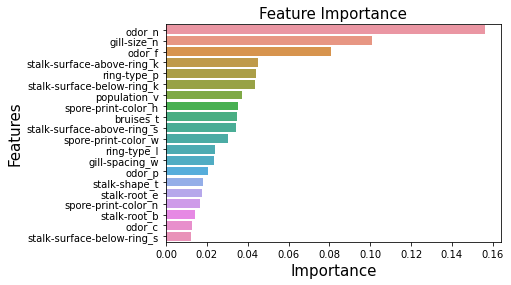

In [31]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': forest.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features[0:20])

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

### Bagging Classifier

In [32]:
from sklearn.ensemble import BaggingClassifier

In [33]:
bag = BaggingClassifier(base_estimator=RandomForestClassifier())

In [34]:
bag_pred = fit_and_score(bag)

Accuracy Score: 100.0%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2085
           1       1.00      1.00      1.00      1977

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062



### XGBM Classifier

In [35]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [36]:
xgb = XGBClassifier(use_label_encoder=False)
xgb_pred = fit_and_score(xgb)

[19:35:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 100.0%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2085
           1       1.00      1.00      1.00      1977

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062



<Figure size 864x864 with 0 Axes>

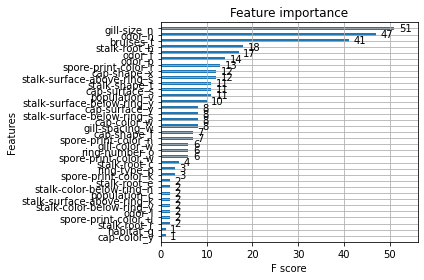

In [37]:
plt.figure(figsize=(12,12))
plot_importance(xgb, height=.5)
plt.tight_layout()

Based on F-Score, we find that gill-size is the most important feature for this particular model, only by a small margin, with odor coming in second.

## LightGBM LGBMClassifier

In [38]:
import lightgbm

In [39]:
lgb= lightgbm.LGBMClassifier()
lgb_score = fit_and_score(lgb)

Accuracy Score: 100.0%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2085
           1       1.00      1.00      1.00      1977

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062



## SVC

In [40]:
from sklearn.svm import SVC

In [41]:
svc = SVC()
svc_pred = fit_and_score(svc)

Accuracy Score: 100.0%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2085
           1       1.00      1.00      1.00      1977

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062



We will drop a few features to see if it changes anything.

In [42]:
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [43]:
df2 = mush[['odor', 'gill-size', 'stalk-surface-below-ring', 'population', 'spore-print-color']]

In [44]:
df2.head()

,odor,gill-size,stalk-surface-below-ring,population,spore-print-color
0,p,n,s,s,k
1,a,b,s,n,n
2,l,b,s,n,n
3,p,n,s,s,k
4,n,b,s,a,n


In [45]:
df2 = pd.get_dummies(df2, drop_first=True)

In [46]:
df2.shape

(8124, 25)

Now we will make a prediction on four different features.

In [47]:
X = df2
y = mush['class']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

In [49]:
forest_new = RandomForestClassifier()
forest_new.fit(X_train, y_train)
pred = forest_new.predict(X_test)

print(accuracy_score(y_test, pred) * 100)
print(classification_report(y_test, pred))

100.0
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      2085
           p       1.00      1.00      1.00      1977

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062



In [50]:
logreg_new = LogisticRegression()
pred = fit_and_score(logreg_new)

Accuracy Score: 99.92609999999999%
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      2085
           p       1.00      1.00      1.00      1977

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062

